# **Sentiment Analysis for Entresto**
____

Author: **Daniel Eduardo López**

<font size="-1"><a href="https://www.linkedin.com/in/daniel-eduardo-lopez">LinkedIn</a> | <a href="https://github.com/DanielEduardoLopez">GitHub </a></font>

**8 Feb 2025**

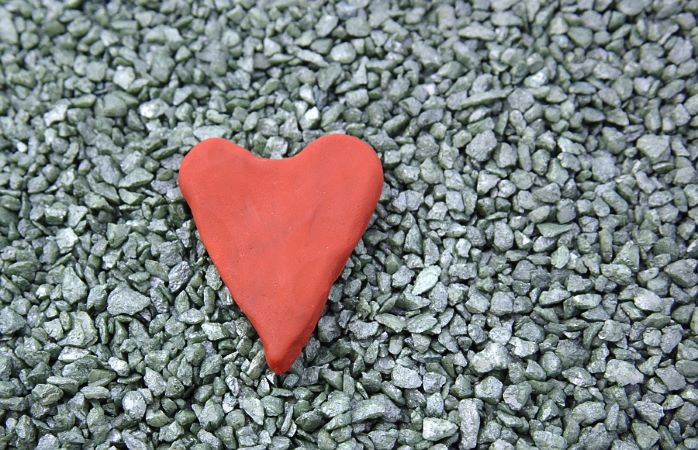


<font size="-1">Image Credit: <a href="https://www.freeimages.com/photo/heart-1168044">jordifa</a> from <a href="https://www.freeimages.com/">FreeImages</a>.</font>

___
## **Table of Contents**
___

1. [**Introduction**](#intro)<br>
    1.1 [Background](#background)<br>
    1.2 [General Objective](#objective)<br>
    1.3 [Research Question](#question)<br>
    1.4 [Hypothesis](#hypothesis)<br>
    1.5 [Methodology](#methodology)<br>
    1.6 [Notebook's Goal](#goal)<br>
2. [**Data Collection**](#collection)<br>
3. [**Data Understanding**](#understanding)<br>
    3.1 [Data Description](#description)<br>
    3.2 [Data Exploration](#exploration)<br>
    3.3 [Data Quality](#quality)<br>  
4. [**Data Preparation**](#preparation)<br>
    4.1 [Text Cleaning](#cleaning)<br>
    4.2 [Tokenization and Stop Words Removal](#tokenization)<br>
    4.3 [POS Tagging](#pos)<br>
    4.4 [Lemmatization](#lemmatization)<br>
5. [**Exploratory Data Analysis**](#eda)<br>
    5.1 [Comments Count](#comments_count)<br>
    5.2 [Comments Length](#comments_length)<br>
    5.3 [Words Count](#words_count)<br>
    5.4 [Unique Words Count](#unique_words_count)<br>
    5.5 [Words Frequency](#words_frequency)<br>
    5.6 [Words Distribution](#words_distribution)<br>
6. [**Data Modeling**](#modeling)<br>
    6.1 [Pending](#model)<br>
7. [**Evaluation**](#evaluation)<br>
    7.1 [Pending](#models_ranking)<br>
8. [**Conclusions**](#conclusions)<br>
9. [**References**](#references)<br>

<a class="anchor" id="intro"></a>
___
## **1. Introduction**
___

### **1.1 Background** <a class="anchor" id="intro"></a>

Entresto&trade; is a medicine used to treat adults with chronic heart failure who have symptoms of the disease and reduced ejection fraction to help reduce the risk of death and hospitalization. It contains the active substances sacubitril and valsartan. This medicine is available as tablets and granules to be taken by mouth twice a day [(European Medicines Agency, 2023)](#ema).

Collecting the opinions and experiences from the patients with a given medicine represents an important task for the drug manufacturer and regulatory agencies. In this sense, Natural Language Processing (NLP), understood as the programming of computers for processing and
analysing large amounts of natural language data, and the web, as a readily available source of information [(Rogel-Salazar, 2020)](#rogel), could be used as a feasible solution.

Sentiment analysis is the study of people's opinions, sentiments, appraisals, attitudes, and emotions expressed in written text towards an entity using NLP [(Bing, 2015)](#bing). It is commonly used to classify a sentiment or opinion as positive, negative, or neutral; and it is valuable to extract and exploit information from social media as its most important insight "is what people talk about and what their opinions are" [(Bing, 2015)](#bing).

Although several algorithms and approaches exist to perform sentiment analysis, such as supervised techniques using machine learning or custom score functions, it was decided to use a **lexicon-based approach** [(Medhat, Hassan & Korashy, 2014)](#medhat), which consists of lists of positive and negative words that occur frequently in product reviews that serves to calculate the sentiment score in a document [(Bing, 2015)](#bing). The lexicon-based approach was selected because, unlike machine learning models, it does not require labeled training data. 

In this context, the purpose of the present study is to perform a sentiment analysis on a sample of social media data about Entresto&trade;.

### **1.2 General Objective** <a class="anchor" id="objective"></a>

To extract the opinions from patients on a sample of social media about Entresto&trade;.

### **1.3 Research question** <a class="anchor" id="question"></a>

What are the opinions from patients on a sample of social media about Entresto&trade;.

### **1.4 Hypothesis** <a class="anchor" id="hypothesis"></a>

The opinions from patients on a sample of social media about Entresto&trade; are positive.

### **1.5 Methodology** <a class="anchor" id="methodology"></a>

The methodology of the present study is based on the CRISP-DM [(Chapman et al., 2000)](#chapman) framework and Rollin’s *Foundational Methodology for Data Science* [(Rollins, 2015)](#rollins):

1. **Analytical approach**: Lexicon-based analysis.
2. **Data requirements**: Text data with comments from patients in English.
3. **Data collection**: Sample taken from <a href="https://www.reddit.com/">Reddit</a>.
4. **Data exploration**: Data was explored with Python 3 and its libraries Numpy, Pandas, Matplotlib and Seaborn.
5. **Data preparation**: Data was cleaned and prepared by performing steps of cleaning, tokenization, stopwords removal, POS tagging, and lemmatization using NLTK.
6. **Exploratory Data Analysis**: Statistical measures were assessed using Python 3 and its libraries Pandas, Matplotlib, and Seaborn.
7. **Data modeling**: Rule-based sentiment analysis using TextBlob.
8. **Evaluation**: No evaluation was performed as lexicon-based analysis is an unsupervised approach [(Bing, 2015)](#bing).

### **1.6 Notebook's Goal** <a class="anchor" id="goal"></a>

In this context, the purpose of the present notebook is to collect, explore, prepare, and analyze the text data for Entresto&trade;.

In [1]:
# Loading requirements file
# %pip install -r requirements.txt

In [2]:
# Libraries installation
# %pip install ipykernel
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install nltk
# %pip install -U textblob
# %pip install beautifulsoup4
# %pip install lxml
# %pip install html5lib

In [3]:
# Libraries importation
import warnings
import itertools
import sys
sys.path.insert(1, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib_inline.backend_inline
import seaborn as sns
import nltk
from wordcloud import WordCloud
from textblob import TextBlob

import src.scraping as scraping
import src.preprocessing as preprocessing

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dlope\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dlope\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\dlope\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dlope\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Setting theme and plot resolution
sns.set_theme(context = 'notebook', style = 'darkgrid')
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 300
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Setting default plot's aesthetics
plotfontcolor = 'dimgray'
mpl.rcParams['text.color'] = plotfontcolor
mpl.rcParams['axes.labelcolor'] = plotfontcolor
mpl.rcParams['xtick.color'] = plotfontcolor
mpl.rcParams['ytick.color'] = plotfontcolor
mpl.rcParams["font.size"] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"

# Disabling warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="collection"></a>
___
## **2. Data Collection**
___


Data was collected on October 20, 2024, from <a href="https://www.reddit.com/">Reddit</a>, under the thread *"Entresto -- your experience"*. To recover the whole page with users comments, the extension <a href="https://github.com/gildas-lormeau/SingleFile">SingleFile</a> was used on a Mozilla FireFox web browser.

In [5]:
html_file_path = '../data/raw/raw_data.html'

raw_str_with_html_tags = scraping.read_html(html_file_path, tag='div', id='-post-rtjson-content')
raw_str = scraping.remove_html_tags(raw_str_with_html_tags)
raw_str[0:10]

[' My EF went from &lt;10% to 50â€“55% in about 15 months with Entresto, Metoprolol Succinate and Farxiga. My copay for a 90-day supply of Entresto is $75 but Entresto\'s co-pay savings program reduces that to only $10 per 90 days.  Novartis offers three types of assistance:  Everyone is eligible for a one-time free 30-day supply of Entresto  People with commercial insurance (employer-provided and marketplace plans) are eligible for a co-pay assistance card which will reduce co-pay/co-insurance to as little as $10 per fill (up to a maximum $3250 per year including the free 30-days, if you use that)  People without prescription coverage can apply for assistance through the Novartis patient assistance program (I assume income limits apply but don\'t know the details)  Information on all of this is available at https://enspiresupport.entresto.com/.  You may want to look for a health insurance plan on healthcare.gov. You may find the tax credit covers much or all of your premium but even w

In [6]:
df_raw = pd.DataFrame(raw_str, columns=['comments'])
df_raw.head()

,comments
0,My EF went from &lt;10% to 50â€“55% in about ...
1,No prescription coverage? I pay $75 for 90 da...
2,I just wanted to to chime in that some folks ...
3,There is a coupon I got through the manufactu...
4,tnx ... I'll check out their website.


<a class="anchor" id="understanding"></a>
___
## **3. Data Understanding**
___


In this section, the sample dataset was explored to identify its basic text statistics and assess its quality.

### **3.1 Data Description** <a class="anchor" id="description"></a>

The format and quantity of data was assessed.

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  19 non-null     object
dtypes: object(1)
memory usage: 284.0+ bytes


In [8]:
df_raw.describe()

,comments
count,19
unique,19
top,My EF went from &lt;10% to 50â€“55% in about ...
freq,1


### **3.2 Data Exploration** <a class="anchor" id="description"></a>

It was calculated the number of comments, length of comments, distribution of comments length, number of words, number of unique words, distribution of words count, and most common words.

#### **Number of comments**

In [9]:
df_raw.shape[0]

19

#### **Length of comments**

In [10]:
comments_length = df_raw.comments.apply(len)
comments_length.describe()

count      19.000000
mean      692.736842
std      1644.352721
min        15.000000
25%       114.000000
50%       181.000000
75%       270.000000
max      7007.000000
Name: comments, dtype: float64

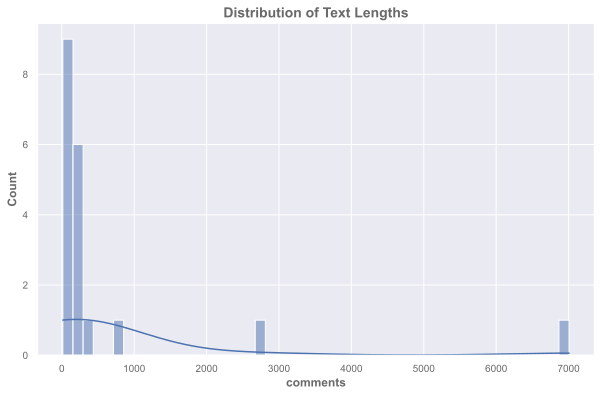

In [11]:
# Plot distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(comments_length, bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.show()

#### **Number of words**

In [12]:
raw_words = df_raw.comments.apply(preprocessing.tokenize_text)
raw_words[:10]

0    [ef, went, lt, months, entresto, metoprolol, s...
1    [prescription, coverage, pay, days, insane, co...
2    [wanted, chime, folks, notice, drop, blood, pr...
3    [coupon, got, manufacturer, pay, pills, go, we...
4                                [tnx, check, website]
5    [buy, one, month, time, case, tolerate, husban...
6    [buy, canada, lol, cost, cdn, month, without, ...
7    [initial, price, thousands, well, like, others...
8    [years, ago, survived, widow, maker, started, ...
9    [dad, cardio, myopathy, heart, failure, slight...
Name: comments, dtype: object

In [13]:
raw_words_flatten = [word for row in raw_words for word in row]
raw_words_flatten[:10]

['ef',
 'went',
 'lt',
 'months',
 'entresto',
 'metoprolol',
 'succinate',
 'farxiga',
 'copay',
 'supply']

In [14]:
len(raw_words_flatten)

1109

#### **Number of unique words**

In [15]:
len(set(raw_words_flatten))

650

#### **Frequency of words**

In [16]:
raw_words_frequency = (pd.DataFrame(raw_words_flatten, columns=['word'])
                        .assign(count = 1).groupby('word')[['count']].sum()
                        .sort_values('count', ascending=False).reset_index())
raw_words_frequency.describe()

,count
count,650.000000
mean,1.706154
std,1.536849
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,16.000000


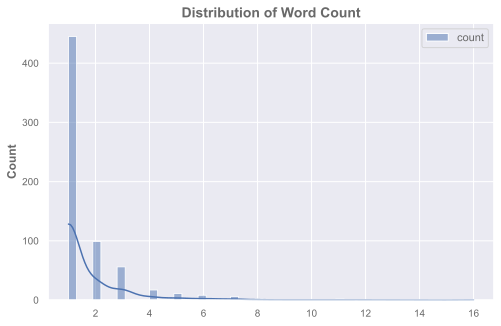

In [17]:
# Plot distribution of word counts
plt.figure(figsize=(8, 5))
sns.histplot(raw_words_frequency, bins=50, kde=True)
plt.title('Distribution of Word Count')
plt.show()

In [18]:
top_20_raw_words = raw_words_frequency.head(20)
top_20_raw_words

,word,count
0,entresto,16
1,also,12
2,heart,11
3,would,11
4,low,10
5,little,9
6,years,8
7,much,8
8,ef,7
9,normal,7


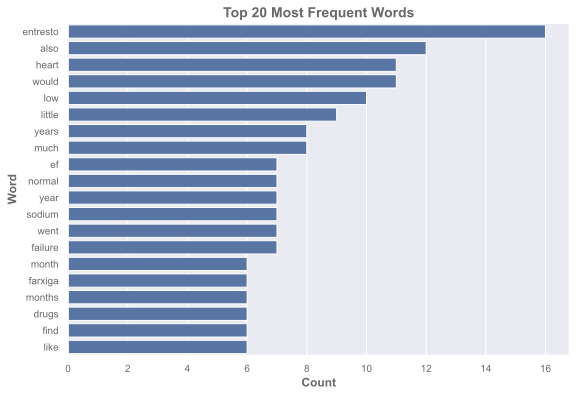

In [19]:
fig = plt.figure(figsize=(9,6))
sns.barplot(top_20_raw_words, x= 'count', y='word')
plt.ylabel('Word')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Words')
plt.show()

### **3.3 Data Quality** <a class="anchor" id="quality"></a>

Missing values and duplicated values were assessed.

In [20]:
df_raw.isna().sum()

comments    0
dtype: int64

In [21]:
df_raw.duplicated().sum()

np.int64(0)

<a class="anchor" id="preparation"></a>
___
## **4. Data Preparation**
___

In the present section, text was preprocessed to remove non-alphabetical characters, tokenize words, add POS tagging, remove stopwords, and obtaining the stem words.

### **4.1 Text Cleaning** <a class="anchor" id="cleaning"></a>

Non-alphabetical characters like special characters and numbers were removed.

In [22]:
df = df_raw.copy()
df['comments'] = df.comments.apply(preprocessing.clean_text)
df.head(8)

,comments
0,My EF went from lt to in about months with Ent...
1,No prescription coverage I pay for days That s...
2,I just wanted to to chime in that some folks w...
3,There is a coupon I got through the manufactur...
4,tnx I ll check out their website
5,Only buy one month at a time in case you can t...
6,And buy it in Canada if you can Lol The cost h...
7,My initial price was in the thousands as well ...


### **4.2 Tokenization and Stop Words Removal** <a class="anchor" id="tokenization"></a>

Then, the text was split into pieces called tokens and stop words were removed. 

In [23]:
df['comments'] = df.comments.apply(preprocessing.tokenize_text)
df.head(8)

,comments
0,"[ef, went, lt, months, entresto, metoprolol, s..."
1,"[prescription, coverage, pay, days, insane, co..."
2,"[wanted, chime, folks, notice, drop, blood, pr..."
3,"[coupon, got, manufacturer, pay, pills, go, we..."
4,"[tnx, check, website]"
5,"[buy, one, month, time, case, tolerate, husban..."
6,"[buy, canada, lol, cost, cdn, month, without, ..."
7,"[initial, price, thousands, well, like, others..."


### **4.3 POS Tagging** <a class="anchor" id="pos"></a>

Later, each token was converted into a tuple of the form ```(word, tag)``` in a process called Parts of Speech (POS) tagging. Its purpose is to assign POS tags to "words expressing their syntactic features in their corresponding contexts" [(Turki Khemakhem, Jamoussi, & Ben Hamadou, 2016)](#turki).

This processing step was performed using **NLTK** *pos_tag* function

In [24]:
df.comments = df.comments.apply(nltk.pos_tag)
df.head()

,comments
0,"[(ef, JJ), (went, VBD), (lt, JJ), (months, NNS..."
1,"[(prescription, NN), (coverage, NN), (pay, NN)..."
2,"[(wanted, VBN), (chime, JJ), (folks, NNS), (no..."
3,"[(coupon, NN), (got, VBD), (manufacturer, NN),..."
4,"[(tnx, RB), (check, VB), (website, NN)]"


### **4.4 Lemmatization** <a class="anchor" id="lemmatization"></a>

*Lemmatization* refers to the process of obtaining "the so-called lemma, or dictionary form, of a word" [(Rogel-Salazar, 2020)](#rogel), which provides more meaningful root words.

In [25]:
df.comments = df.comments.apply(preprocessing.lemmatize_text)
df.head()

,comments
0,ef went lt month entresto metoprolol succina...
1,prescription coverage pay day insane company...
2,wanted chime folk notice drop blood pressure...
3,coupon got manufacturer pay pill go website
4,tnx check website


<a class="anchor" id="eda"></a>
___
## **5. Exploratory Data Analysis**
___

In the present section, the processed text was analized to explore its general features.

### **5.1 Comments Count** <a class="anchor" id="comments_count"></a>

In [26]:
len(df.comments)

19

### **5.2 Comments Length** <a class="anchor" id="comments_length"></a>

In [27]:
processed_comments_length = df.comments.apply(len)
processed_comments_length.describe()

count      19.000000
mean      418.210526
std      1009.652172
min         9.000000
25%        48.000000
50%       111.000000
75%       162.000000
max      4242.000000
Name: comments, dtype: float64

### **5.3 Words Count** <a class="anchor" id="words_count"></a>

In [28]:
words_flatten = df.comments.str.split().explode().tolist()
words_flatten[:10]

['ef',
 'went',
 'lt',
 'month',
 'entresto',
 'metoprolol',
 'succinate',
 'farxiga',
 'copay',
 'day']

In [29]:
len(words_flatten)

1178

### **5.4 Unique Words Count** <a class="anchor" id="unique_words_count"></a>

In [30]:
len(set(words_flatten))

649

### **5.5 Words Frequency** <a class="anchor" id="words_frequency"></a>

In [31]:
words_frequency = (pd.DataFrame(words_flatten, columns=['word'])
                .assign(count = 1).groupby('word')[['count']].sum()
                .sort_values('count', ascending=False).reset_index())
words_frequency.describe()

,count
count,649.000000
mean,1.815100
std,1.902651
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


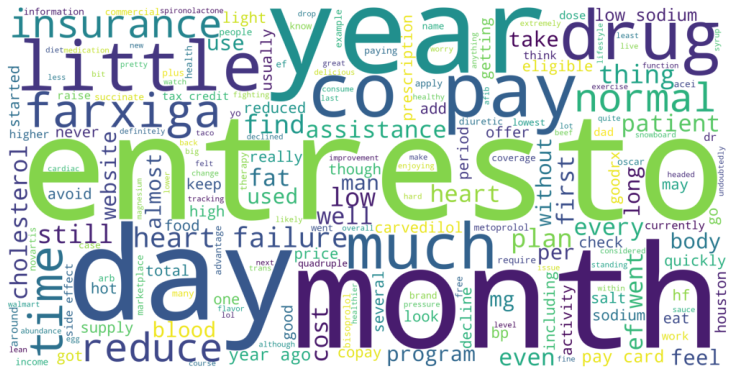

In [34]:
wordcloud = WordCloud(width = 3000, height = 1500,
                    background_color ='white',
                    #mask = maskArray,      
                    #stopwords = stopwords,
                    min_font_size = 10)
wordcloud.generate(' '.join(words_flatten))   

# Plot the WordCloud
plt.figure(figsize = (10, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../reports/figures/fig_wordcloud.png')
plt.show()

In [36]:
top_20_words = words_frequency.head(20)
top_20_words

,word,count
0,entresto,17
1,month,16
2,year,15
3,pay,14
4,day,13
5,also,12
6,co,12
7,heart,12
8,would,11
9,low,10


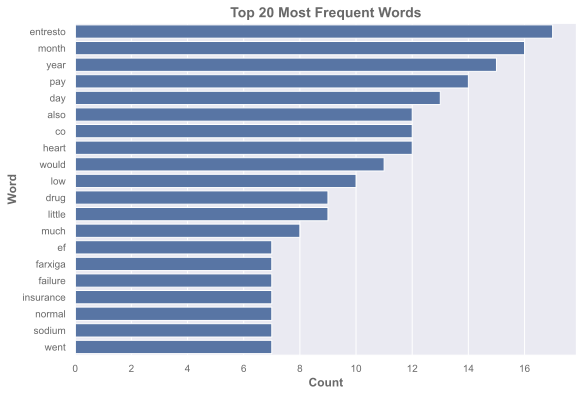

In [37]:
fig = plt.figure(figsize=(9,6))
sns.barplot(top_20_words, x= 'count', y='word')
plt.ylabel('Word')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Words')
plt.savefig('../reports/figures/fig_top_20_most_frequent_words.png', bbox_inches = 'tight')
plt.show()

### **5.6 Words Distribution** <a class="anchor" id="words_distribution"></a>

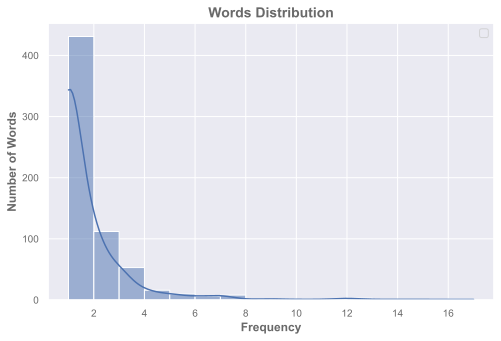

In [46]:
# Plot distribution of word counts
plt.figure(figsize=(8, 5))
sns.histplot(words_frequency, kde=True, binwidth=1)
plt.title('Words Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of Words')
plt.legend([])
plt.savefig('../reports/figures/fig_words_distribution.png', bbox_inches = 'tight')
plt.show()

<a class="anchor" id="references"></a>
___
## **9. References**
___

* <a class="anchor" id="bing"></a>**Bing, L. (2015).** *Sentiment analysis: mining opinions, sentiments, and emotions*. Cambridge University Press.
* <a class="anchor" id="chapman"></a>**Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., & Wirth, R. (2000)**. *CRISP-DM 1.0: Step-by-step data mining guide*. CRISP-DM consortium. https://api.semanticscholar.org/CorpusID:59777418
* <a class="anchor" id="ema"></a>**European Medicines Agency (2023).** *Entresto (sacubitril / valsartan)*. https://www.ema.europa.eu/en/documents/overview/entresto-epar-summary-public_en.pdf
* <a class="anchor" id="medhat"></a>**Medhat, W., Hassan, A. & Korashy, H. (2014).** Sentiment analysis algorithms and applications:
A survey. *Ain Shams Engineering Journal*. 5: 1093-1113. http://dx.doi.org/10.1016/j.asej.2014.04.011 
* <a class="anchor" id="rogel"></a>**Rogel-Salazar, J. (2020).** *Advanced Data Science and Analytics with Python*. CRC Press.
* <a class="anchor" id="rollins"></a> **Rollins, J. B. (2015)**. *Foundational Methodology for Data Science*. Somers: IBM Corporation. https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF
* <a class="anchor" id="turki"></a> **Turki Khemakhem, I., Jamoussi, S., & Ben Hamadou, A. (2016).** POS Tagging without a Tagger: Using Aligned Corpora for Transferring Knowledge to Under-Resourced Languages. *Computación y Sistemas*, 20(4), 667-679. https://doi.org/10.13053/cys-20-4-2430